In [6]:
from IPython.display import display, HTML

# 데이터 전처리 패키지
import numpy as np
import pandas as pd

# 기계학습 모델 구축 및 성능 평가 패키지
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy as sp
import scipy.stats as stats
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split

# 데이터 시각화 패키지
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 한글 폰트 설정
plt.rc('font', family="Malgun Gothic")

In [7]:
california = fetch_california_housing()
print(california.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [8]:
X = pd.DataFrame(california.data, columns=california.feature_names)
y = pd.DataFrame(california.target, columns=['House Value'])

# 데이터 전처리

In [9]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [10]:
y.head()

,House Value
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422


In [11]:
data = pd.concat([X,y], axis=1)

In [12]:
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,House Value
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


# 모델을 학습(train)및 테스트 (test) 데이터로 분리

In [13]:
train_data, test_data = train_test_split(data, test_size=0.3, random_state=20240103)

In [14]:
train_data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,House Value
2783,2.1212,16.0,5.330532,1.112045,1501.0,2.102241,37.35,-118.18,1.083
10800,6.5928,28.0,5.057307,1.117479,832.0,2.383954,33.62,-117.94,4.391
15094,2.5949,12.0,4.385895,1.136292,3112.0,2.465927,32.82,-116.95,1.083
18675,6.0281,18.0,6.538066,1.131687,2304.0,2.370370,36.96,-121.88,3.211
10142,7.8980,23.0,6.665217,0.982609,693.0,3.013043,33.90,-117.89,2.582


In [15]:
train_data.shape

(14448, 9)

In [16]:
test_data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,House Value
9888,2.7619,21.0,4.043796,0.981752,524.0,1.912409,38.30,-122.30,1.546
18312,5.2114,40.0,5.338485,1.001546,1498.0,2.315301,37.43,-122.13,4.384
16028,5.0634,52.0,4.732558,0.986047,1193.0,2.774419,37.73,-122.45,2.642
19610,3.7045,6.0,5.353474,1.003021,1011.0,3.054381,37.48,-121.14,1.281
11589,5.1061,26.0,6.714765,1.013423,836.0,2.805369,33.78,-118.03,2.575


In [19]:
test_data.shape

(6192, 9)

# 모델링
- OLS: 가장 기본적인 결정론적 선형 회귀 방법으로 잔차제곱합(RSS: Residual Sum of Squares)를 최소화하는 가중치(β1, β2 ...) 구하는 방법
- 모델 선언: model = sm.OLS(Y데이터, X데이터)
- 모델 학습: model_trained = model.fit()

In [20]:
lm = sm.OLS(train_data['House Value'], train_data.drop(['House Value'], axis=1))

In [22]:
lm_trained = lm.fit()

# 모델 해석

In [24]:
display(lm_trained.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            House Value   R-squared (uncentered):                   0.893
Model:                            OLS   Adj. R-squared (uncentered):              0.893
Method:                 Least Squares   F-statistic:                          1.501e+04
Date:                Wed, 03 Jan 2024   Prob (F-statistic):                        0.00
Time:                        18:55:19   Log-Likelihood:                         -16800.
No. Observations:               14448   AIC:                                  3.362e+04
Df Residuals:                   14440   BIC:                                  3.368e+04
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
MedInc         0.5123      0.005    101.115      0.000       0.502       0.522
HouseAge       0.0159      0.001     28.749      0.000       0.015       0.017
AveRooms      -0.1896      0.007    -25.590      0.000      -0.204      -0.175
AveBedrms      0.8785      0.035     24.939      0.000       0.809       0.948
Population  8.887e-06   6.15e-06      1.444      0.149   -3.17e-06    2.09e-05
AveOccup      -0.0042      0.001     -8.002      0.000      -0.005      -0.003
Latitude      -0.0613      0.004    -14.337      0.000      -0.070      -0.053
Longitude     -0.0157      0.001    -11.599      0.000      -0.018      -0.013
==============================================================================
Omnibus:                     3140.199   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11395.611
Skew:                           1.063   Prob(JB):                         0.00
Kurtosis:                       6.796   Cond. No.                     1.02e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.02e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# 예측값 도출 및 예측 성능 평가

### 학습 데이터(Training Data)에 대한 (1) 예측 및 (2) 성능 평가

In [25]:
train_data

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,House Value
2783,2.1212,16.0,5.330532,1.112045,1501.0,2.102241,37.35,-118.18,1.083
10800,6.5928,28.0,5.057307,1.117479,832.0,2.383954,33.62,-117.94,4.391
15094,2.5949,12.0,4.385895,1.136292,3112.0,2.465927,32.82,-116.95,1.083
18675,6.0281,18.0,6.538066,1.131687,2304.0,2.370370,36.96,-121.88,3.211
10142,7.8980,23.0,6.665217,0.982609,693.0,3.013043,33.90,-117.89,2.582
...,...,...,...,...,...,...,...,...,...
12803,4.6625,44.0,6.197333,1.101333,823.0,2.194667,38.60,-121.45,1.589
4593,1.5727,26.0,2.151571,1.245841,1685.0,3.114603,34.05,-118.27,2.250
17546,2.4306,39.0,4.899209,1.069170,1990.0,3.932806,37.34,-121.87,2.891
4865,1.2969,24.0,2.486434,1.056202,1932.0,3.744186,34.04,-118.28,1.602


In [26]:
train_pred = lm_trained.predict(train_data.drop(["House Value"], axis=1))

In [27]:
train_pred

2783     0.880138
10800    3.635845
15094    1.531117
18675    2.789813
10142    3.779919
           ...   
12803    2.420907
4593     1.679475
17546    1.503099
4865     1.276674
9150     2.591712
Length: 14448, dtype: float64

c:\Users\camar\anaconda3\envs\tf-gpu\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


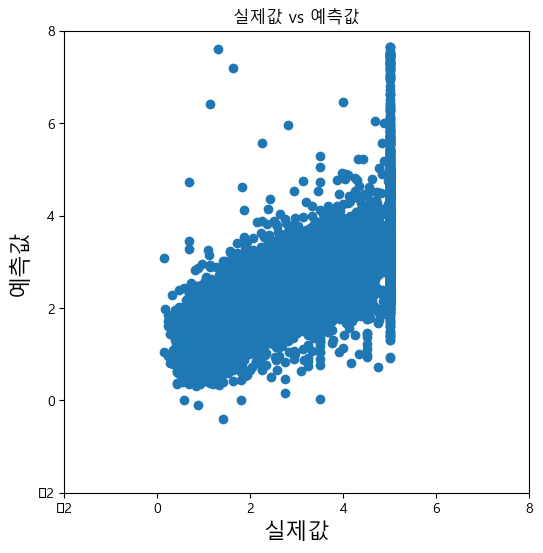

In [28]:
plt.figure(figsize=(6,6))
plt.title('실제값 vs 예측값')
plt.scatter(train_data['House Value'], train_pred)
plt.xlabel('실제값', size=16)
plt.ylabel('예측값', size=16)
plt.xlim(-2, 8)
plt.ylim(-2, 8)
plt.show()

In [31]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

def mean_absolute_percentage_error(y_true, y_pred):
  y_true, y_pred = np.array(y_true), np.array(y_pred)
  return np.mean(np.abs((y_true - y_pred)/y_true)) * 100 # abs : 절대값

In [37]:
print('Training MSE : {:.3f}'.format(mean_squared_error(train_data['House Value'], train_pred)))
print('Training RMSE : {:.3f}'.format(np.sqrt(mean_squared_error(train_data['House Value'], train_pred))))
print('Training MAE : {:.3f}'.format(mean_absolute_error(train_data['House Value'], train_pred)))
print('Training MAPE : {:.3f}'.format(mean_absolute_percentage_error(train_data['House Value'], train_pred)))
print('Training R2 : {:.3f}'.format(r2_score(train_data['House Value'], train_pred)))

Training MSE : 0.599
Training RMSE : 0.774
Training MAE : 0.571
Training MAPE : 34.714
Training R2 : 0.546


# 테스트 데이터(Testing Data)에 대한 예측 성능 평가

In [33]:
test_data

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,House Value
9888,2.7619,21.0,4.043796,0.981752,524.0,1.912409,38.30,-122.30,1.546
18312,5.2114,40.0,5.338485,1.001546,1498.0,2.315301,37.43,-122.13,4.384
16028,5.0634,52.0,4.732558,0.986047,1193.0,2.774419,37.73,-122.45,2.642
19610,3.7045,6.0,5.353474,1.003021,1011.0,3.054381,37.48,-121.14,1.281
11589,5.1061,26.0,6.714765,1.013423,836.0,2.805369,33.78,-118.03,2.575
...,...,...,...,...,...,...,...,...,...
5196,1.6625,43.0,3.850000,1.011765,1182.0,3.476471,33.94,-118.27,0.887
6683,5.0393,45.0,6.229462,1.014164,942.0,2.668555,34.16,-118.09,3.211
127,6.0194,44.0,5.735343,1.000000,1358.0,2.274707,37.84,-122.21,2.923
4836,2.1471,32.0,2.322581,0.978495,702.0,3.774194,34.04,-118.29,1.250


In [34]:
test_pred = lm_trained.predict(test_data.drop(['House Value'], axis=1))

In [35]:
display(test_pred)

9888     1.415943
18312    2.801820
16028    2.999699
19610    1.462742
11589    2.426607
           ...   
5196     1.468245
6683     2.765692
127      3.177641
4836     1.791075
17871    1.491376
Length: 6192, dtype: float64

c:\Users\camar\anaconda3\envs\tf-gpu\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


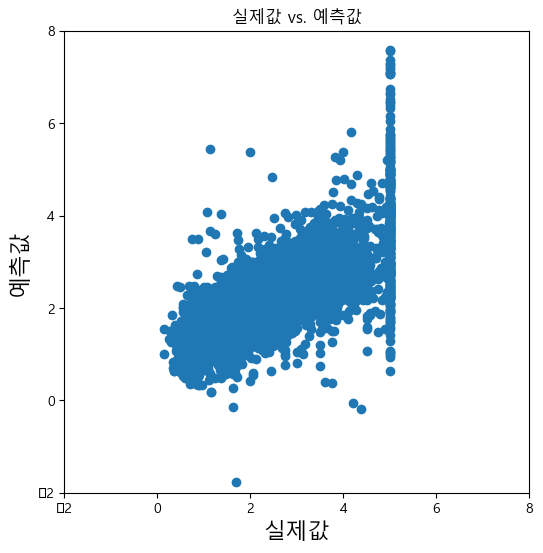

Testing MSE: 0.617
Testing RMSE: 0.785
Testing MAE: 0.577
Testing MAPE: 34.879
Testing R2: 0.546


In [36]:
plt.figure(figsize=(6, 6))
plt.title('실제값 vs. 예측값')
plt.scatter(test_data['House Value'], test_pred)
plt.xlabel('실제값', size=16)
plt.ylabel('예측값', size=16)
plt.xlim(-2, 8)
plt.ylim(-2, 8)
plt.show()

print('Testing MSE: {:.3f}'.format(mean_squared_error(test_data['House Value'], test_pred)))
print('Testing RMSE: {:.3f}'.format(np.sqrt(mean_squared_error(test_data['House Value'], test_pred))))
print('Testing MAE: {:.3f}'.format(mean_absolute_error(test_data['House Value'], test_pred)))
print('Testing MAPE: {:.3f}'.format(mean_absolute_percentage_error(test_data['House Value'], test_pred)))
print('Testing R2: {:.3f}'.format(r2_score(test_data['House Value'], test_pred)))